# 1. Setting The Directory

In [71]:
from google.colab import drive
drive.mount('/gdrive/')

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


In [72]:
pwd

'/gdrive/My Drive/Colab Notebooks'

In [73]:
import os
os.getcwd( )

'/gdrive/My Drive/Colab Notebooks'

In [74]:
os.chdir('/gdrive/MyDrive/Colab Notebooks/')

In [75]:
os.getcwd( )

'/gdrive/MyDrive/Colab Notebooks'

# 2. Connecting Colab With Kaggle For Downloading Datasets

In [76]:
!pip install --upgrade --ignore-installed kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached urllib3-1.26.13-py2.py3-none-any.whl (140 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached python_slugify-7.0.0-py2.py3-none-any.whl (9.4 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [77]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"hadiaramzan","key":"29d51e9283e655319af8c6e2a869534a"}'}

In [78]:
!mkdir ~/.kaggle #created at root folder in colab

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [79]:
#copy
!cp kaggle.json ~/.kaggle

In [80]:
! chmod 600 ~/.kaggle/kaggle.json

In [81]:
!kaggle datasets download -d puneet6060/intel-image-classification #kaggle datasets list

intel-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [82]:
#unzip dataset in colab session
!unzip -q intel-image-classification.zip # -q for quiet 

replace seg_pred/seg_pred/10005.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [83]:
# copy zipped dataset into your drive
!cp "/gdrive/MyDrive/Colab Notebooks/intel-image-classification.zip" /gdrive/MyDrive/

# 3. Importing Necessary Libraries

In [84]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import pathlib
import cv2 as cv
from tensorflow.keras.layers import Dense, RandomFlip, RandomRotation, RandomZoom, RandomWidth, RandomHeight, Rescaling
from tensorflow.keras import Sequential
from tensorflow.keras.activations import softmax

# 4. Setting Up Random Seed

In [85]:
RANDOM_SEED: int = 42

In [86]:
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
tf.experimental.numpy.random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# 5. Setting Up Hyperparameters

In [87]:
BATCH_SIZE: int = 32
EPOCHS: int = 5
IMAGE_SIZE = (150, 150)
AUGMENTATION_FACTOR: float = 0.2
LABEL_MODEL: str = "categorical"


# 6. Data Prepocessing 

## 6.1. Get Class Names

In [88]:
import pathlib
data_dir = pathlib.Path("/gdrive/MyDrive/Colab Notebooks/seg_train/seg_train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])).tolist() # created a list of class_names from the subdirector
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

## 6.2. Setting Directories And Checking The Type of Images In Each Set

In [89]:
train_path = '/gdrive/MyDrive/Colab Notebooks/seg_train/seg_train'
test_path = '/gdrive/MyDrive/Colab Notebooks/seg_test/seg_test'

print("type of Images in Train dataset"+str(os.listdir(train_path)))
print("type of Images in Test dataset"+str(os.listdir(test_path)))

type of Images in Train dataset['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
type of Images in Test dataset['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


## 6.3. Getting Number Of Files In Each Folder

In [90]:
print("Training data:")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_path,
    label_mode=LABEL_MODEL,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True
)

print("Testing data:")
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_path,
    label_mode=LABEL_MODEL,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=False
)

Training data:
Found 14034 files belonging to 6 classes.
Testing data:
Found 3000 files belonging to 6 classes.


## 6.4. Visualizing Random Image From Dataset

Image shape: (150, 150, 3)


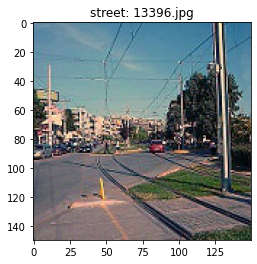

In [91]:
# visualize random image from train set
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

target_class = random.choice(class_names)
target_folder: str = "/gdrive/MyDrive/Colab Notebooks/seg_train/seg_train/" + target_class

# Get a random image path
random_image = random.sample(os.listdir(target_folder), 1)

# Read in the image and plot it using matplotlib
img = mpimg.imread(target_folder + "/" + random_image[0])
plt.imshow(img)
plt.title(f"{target_class}: {random_image[0]}")

print(f"Image shape: {img.shape}")

## 6.5. Visualizing Image From Each Class Label

buildings images:


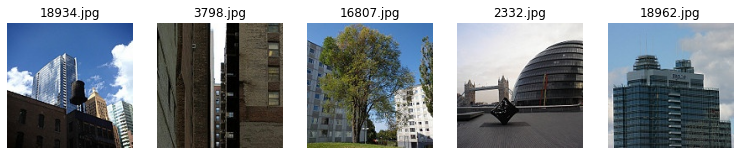

forest images:


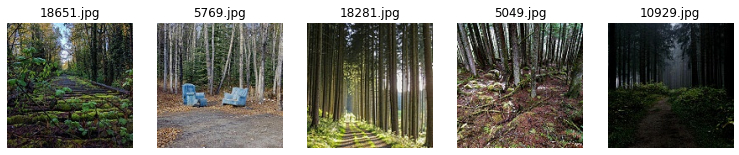

glacier images:


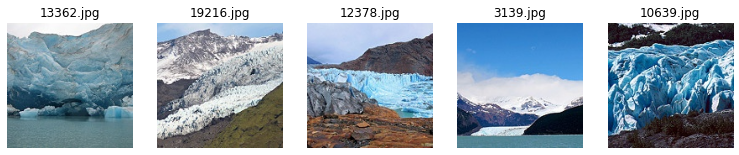

mountain images:


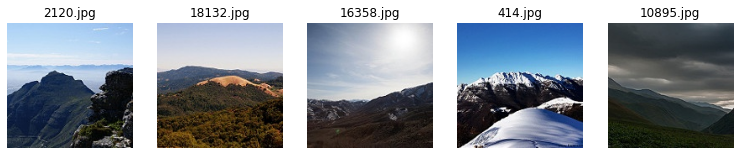

sea images:


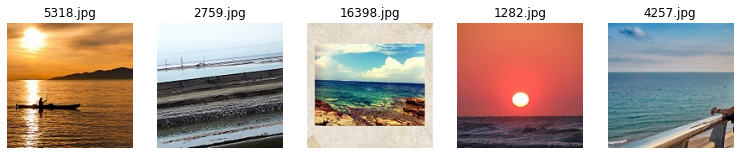

street images:


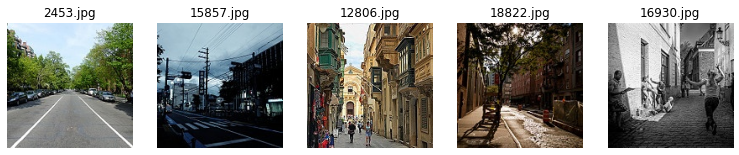

In [92]:
rows, cols = (1, 5)
import matplotlib.pyplot as plt
for categories in os.listdir(train_path):
    print(f'{categories} images:')
    path = f'{train_path}/{categories}'    
    fig = plt.figure(figsize = (13, 8))
    for i in range(rows * cols):
        fig.add_subplot(rows, cols, i+1)
        image_id = os.listdir(path)[np.random.randint(0, 2000)]
        image = cv.imread(path + f'/{image_id}')
        plt.imshow(image[:, :, ::-1])
        plt.title(image_id)
        plt.axis('off')
    plt.show()

## 6.6. Creating And Visualizing Augmentation Layer

In [93]:
augmentation_layer = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(AUGMENTATION_FACTOR),
    RandomZoom(AUGMENTATION_FACTOR),
    RandomWidth(AUGMENTATION_FACTOR),
    RandomHeight(AUGMENTATION_FACTOR),
    Rescaling(1./255)
], name="augmentation_layer")

augmentation_layer

/gdrive/MyDrive/Colab Notebooks/seg_train/seg_train/forest/13122.jpg


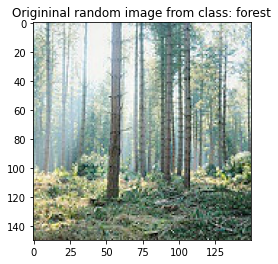

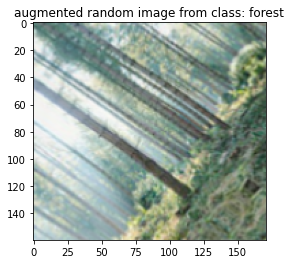

In [94]:
# checking augmentation layer results on random image 
target_dir = train_path
target_class = random.choice(class_names)
target_dir = f"{target_dir}/{target_class}"
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

print(random_image_path)
# Read in the random image
img = mpimg.imread(random_image_path)

plt.title(f"Origininal random image from class: {target_class}")
# plt.axis(False)
plt.imshow(img);

# Now lets plot our augmented random image
augmented_image = augmentation_layer(img, training=True)
plt.figure()
plt.title(f"augmented random image from class: {target_class}")
plt.imshow(augmented_image)

# 7. Base Model Creation Using ResNet50V2

In [95]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# set seed
tf.random.set_seed(RANDOM_SEED)

base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = False

# Creating input layer
input_layer = tf.keras.layers.Input(shape=IMAGE_SIZE + (3,), name="input_layer")
x = augmentation_layer(input_layer)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_2d_layer")(x)
output_layer = Dense(len(class_names), activation=softmax, name="output_layer")(x)

model_1 = tf.keras.Model(input_layer, output_layer)

## 7.1. Model summary discussion

In [96]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 150, 150, 3)]     0         
                                                                 
 augmentation_layer (Sequent  (None, None, 3)          0         
 ial)                                                            
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 global_average_pooling_2d_l  (None, 2048)             0         
 ayer (GlobalAveragePooling2                                     
 D)                                                              
                                                                 
 output_layer (Dense)        (None, 6)                 12294     
                                                           

## 7.2. Tensorflow Callbacks











In [97]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

# set checkpoint path
checkpoint_path = "checkpoint_weights/checkpoint.cpk"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    save_freq="epoch", #save every epoch
    verbose=1
)

# 8. Model Compilation

In [98]:
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 9. Model Fitting

In [99]:
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=int(0.15 * len(test_data)),
    callbacks=[
        early_stopping_callback,
        reduce_lr_callback,
        checkpoint_callback
    ]
)

Epoch 1/5
439/439 [==============================] - ETA: 0s - loss: 0.5573 - accuracy: 0.7953
Epoch 1: val_loss improved from inf to 0.36231, saving model to checkpoint_weights/checkpoint.cpk
439/439 [==============================] - 51s 106ms/step - loss: 0.5573 - accuracy: 0.7953 - val_loss: 0.3623 - val_accuracy: 0.8661 - lr: 0.0010
Epoch 2/5
439/439 [==============================] - ETA: 0s - loss: 0.4293 - accuracy: 0.8448
Epoch 2: val_loss improved from 0.36231 to 0.18632, saving model to checkpoint_weights/checkpoint.cpk
439/439 [==============================] - 47s 105ms/step - loss: 0.4293 - accuracy: 0.8448 - val_loss: 0.1863 - val_accuracy: 0.9241 - lr: 0.0010
Epoch 3/5
439/439 [==============================] - ETA: 0s - loss: 0.4066 - accuracy: 0.8539
Epoch 3: val_loss did not improve from 0.18632
439/439 [==============================] - 45s 102ms/step - loss: 0.4066 - accuracy: 0.8539 - val_loss: 0.3115 - val_accuracy: 0.8906 - lr: 0.0010
Epoch 4/5
439/439 [========

## 9.1. Saving The Trained Model In Drive

In [100]:
model_1.save('/gdrive/MyDrive/Colab Notebooks/model_1.h5')

In [101]:
# load in saved model wights and evaluate model
model_1.load_weights(checkpoint_path)

# 10. Model Evaluation

In [102]:
model_1.evaluate(test_data)

94/94 [==============================] - 6s 67ms/step - loss: 0.3210 - accuracy: 0.8810


[0.3210233747959137, 0.8809999823570251]

## 10.1. Ploting Loss And Accuracy

In [103]:
import matplotlib.pyplot as plt
def plot_loss_curve(history):
    loss = history_1.history['loss']
    val_loss = history_1.history['val_loss']

    accuracy = history_1.history["accuracy"]
    val_accuracy = history_1.history["val_accuracy"]

    epochs = range(len(history_1.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Training Loss', 'Validation Loss'])

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Training Accuracy', 'Validation Accuracy'])

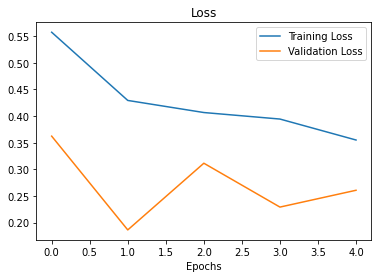

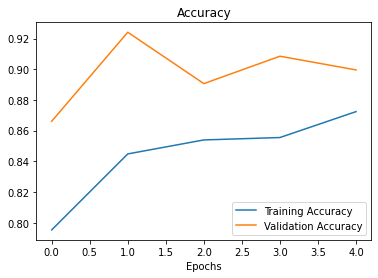

In [104]:
plot_loss_curve(history_1)

# 11. Model Improvement

In [105]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# set seed
tf.random.set_seed(RANDOM_SEED)


base_model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False

In [106]:
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

## 11.1. Updated Results

In [107]:
# fine tune for another 2 epochs

fine_tune_epochs = EPOCHS + 2

# Refit the model (same as model_2 except with more trainable layers)
history_2 = model_1.fit(
    train_data,
    epochs=fine_tune_epochs,
    validation_data=test_data,
    steps_per_epoch=len(train_data),
    validation_steps=int(0.15 * len(test_data)),
    initial_epoch=history_1.epoch[-1],
    callbacks=[
        early_stopping_callback,
        reduce_lr_callback,
        checkpoint_callback
    ]
)

Epoch 5/7
439/439 [==============================] - ETA: 0s - loss: 0.3818 - accuracy: 0.8609
Epoch 5: val_loss improved from 0.18632 to 0.17785, saving model to checkpoint_weights/checkpoint.cpk
439/439 [==============================] - 54s 114ms/step - loss: 0.3818 - accuracy: 0.8609 - val_loss: 0.1778 - val_accuracy: 0.9353 - lr: 1.0000e-04
Epoch 6/7
439/439 [==============================] - ETA: 0s - loss: 0.3096 - accuracy: 0.8866
Epoch 6: val_loss improved from 0.17785 to 0.17602, saving model to checkpoint_weights/checkpoint.cpk
439/439 [==============================] - 49s 112ms/step - loss: 0.3096 - accuracy: 0.8866 - val_loss: 0.1760 - val_accuracy: 0.9286 - lr: 1.0000e-04
Epoch 7/7
439/439 [==============================] - ETA: 0s - loss: 0.2798 - accuracy: 0.9012
Epoch 7: val_loss did not improve from 0.17602
439/439 [==============================] - 48s 109ms/step - loss: 0.2798 - accuracy: 0.9012 - val_loss: 0.2194 - val_accuracy: 0.9085 - lr: 1.0000e-04


In [108]:
model_1.save('/gdrive/MyDrive/Colab Notebooks/model_1_tuned.h5')

# 12. Comparision Between Both Models

In [109]:
# Let's create a function to compare training histories
def compare_historys(original_history, new_history, initial_epochs=5, metric: str = "accuracy"):
  """
  Compares two TensorFlow History objects.
  """
  # Get original history measurements
  acc = original_history.history[metric]
  loss = original_history.history["loss"]

  val_acc = original_history.history[f"val_{metric}"]
  val_loss = original_history.history["val_loss"]

  # Combine original history metrics with new_history metrics
  total_acc = acc + new_history.history[metric]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history[f"val_{metric}"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plot for accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  # Make plot for loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")

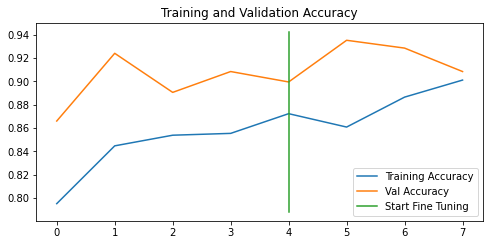

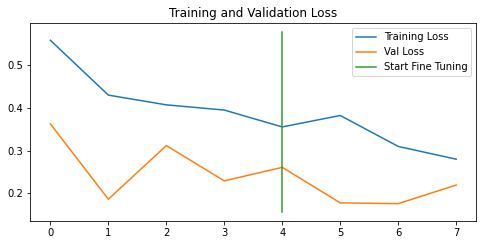

In [110]:
compare_historys(history_1, history_2)

In [111]:
# load in saved model weights and evaluate model
model_1.load_weights(checkpoint_path)

In [112]:
model_1.evaluate(test_data)

94/94 [==============================] - 6s 60ms/step - loss: 0.2608 - accuracy: 0.9083


[0.2608453631401062, 0.9083333611488342]

# 13. Predictions

In [113]:
# Make predictions with model
preds_probs = model_1.predict(test_data)
preds_probs[:10]

94/94 [==============================] - 6s 60ms/step


array([[9.99999404e-01, 1.16364232e-12, 5.48843460e-09, 1.11841270e-09,
        2.78510859e-09, 5.47842546e-07],
       [9.99191582e-01, 1.46332297e-07, 1.96252199e-06, 1.93915662e-06,
        4.75142087e-06, 7.99578091e-04],
       [9.99989629e-01, 1.09447895e-10, 6.66877664e-09, 1.06580018e-07,
        3.07226315e-08, 1.02366203e-05],
       [9.99515533e-01, 2.21732694e-08, 1.91773847e-06, 1.12079551e-05,
        8.71280063e-05, 3.84255225e-04],
       [9.92421448e-01, 2.67279711e-06, 1.94903507e-04, 2.19661088e-04,
        7.06454832e-03, 9.67745218e-05],
       [1.80203259e-01, 3.27252317e-04, 2.89187627e-03, 3.41542885e-02,
        7.17317283e-01, 6.51060119e-02],
       [9.99446809e-01, 1.91094770e-07, 3.30727221e-06, 6.39890823e-06,
        5.84109584e-05, 4.84931807e-04],
       [4.11384016e-01, 8.85276768e-06, 8.13951774e-05, 2.31689599e-04,
        7.07737287e-04, 5.87586343e-01],
       [9.07112479e-01, 1.21619803e-06, 5.35108520e-05, 4.64249069e-06,
        8.02956871e-04, 

In [114]:
# Get the pred classes of each label
pred_classes = preds_probs.argmax(axis=1)
pred_classes[:10]

array([0, 0, 0, 0, 0, 4, 0, 5, 0, 0])

In [115]:
# To get our test labels we need to unravel our test_data BatchDataset
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax()) # currently test labels look like: [0, 0, 0, 1, .... 0, 0], we want the index value where the "1" occurs
y_labels[:10] # look at the first 10 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# 14. Report Generation

In [116]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true=y_labels,
                                  y_pred=pred_classes)
sklearn_accuracy

0.9083333333333333

## 14.1. Confusion Matrix

In [117]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# We need to make some changes to our make_confusion_matrix function to ensure the x-labels print vertically
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  # Makes a labelled confusion matrix comparing predictions and ground truth labels.
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Oranges) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Changed (plot x-labels vertically) ###
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

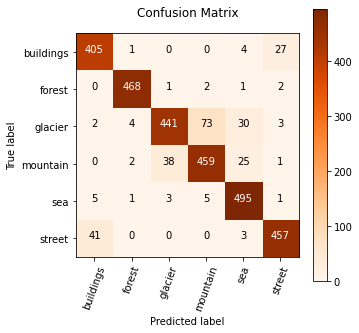

In [118]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(5, 5),
                      text_size=10)

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       437
           1       0.98      0.99      0.99       474
           2       0.91      0.80      0.85       553
           3       0.85      0.87      0.86       525
           4       0.89      0.97      0.93       510
           5       0.93      0.91      0.92       501

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



In [120]:
from sklearn.metrics import classification_report
import pandas as pd

def get_f1_score_on_every_class_name(y_labels, y_true, class_names):
    """Return f1 score on every class name as a dataframe

    Args:
        y_labels (_type_): y_true of test_
        y_pred (_type_): predictions list

    Returns:
        pd.DataFrame: f1-scores dataframe on every class name
    """
    classification_report_dict = classification_report(y_labels, y_true, output_dict=True)
    # Create empty dictionary
    class_f1_scores = {}
    # Loop through classification report dictionary items
    for k, v in classification_report_dict.items():
        if k == "accuracy": # stop once we get to accuracy key
            break
        else:
            # Add class names and f1-scores to new dictionary
            class_f1_scores[class_names[int(k)]] = v["f1-score"]
    class_f1_scores

    # Trun f1-scores into dataframe for visualization
    f1_scores = pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                            "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
    return f1_scores

f1_scores = get_f1_score_on_every_class_name(y_labels=y_labels, y_true=pred_classes, class_names=class_names)
f1_scores

,class_names,f1-score
1,forest,0.985263
4,sea,0.926966
5,street,0.921371
0,buildings,0.910112
3,mountain,0.862782
2,glacier,0.851351
